<a href="https://colab.research.google.com/github/tusharsuthar4828/DataScience_ExcelR/blob/main/Forecasting_Model_based_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

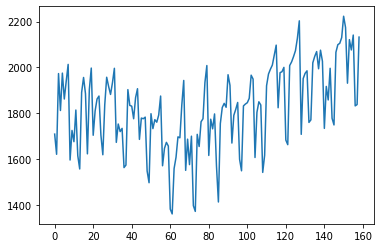

In [2]:
Walmart = pd.read_csv("footfalls.csv")
Walmart.Footfalls.plot()

In [3]:
Walmart.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0


In [4]:
Walmart["Date"] = pd.to_datetime(Walmart.Month,format="%b-%y")
#look for c standard format codes

# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

Walmart["month"] = Walmart.Date.dt.strftime("%b") # month extraction
Walmart["year"] = Walmart.Date.dt.strftime("%Y") # year extraction

#Walmart["Day"] = Walmart.Date.dt.strftime("%d") # Day extraction
#Walmart["wkday"] = Walmart.Date.dt.strftime("%A") # weekday extraction

In [6]:
Walmart

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,Jan,1991
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,Feb,1991
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,Mar,1991
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,Apr,1991
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,May,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01,Nov,2003
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01,Dec,2003
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01,Jan,2004
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0,2004-02-01,Feb,2004


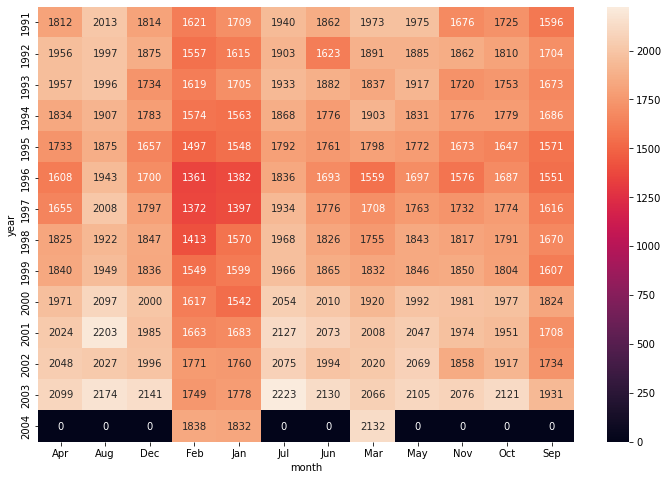

In [7]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Walmart,values="Footfalls",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values


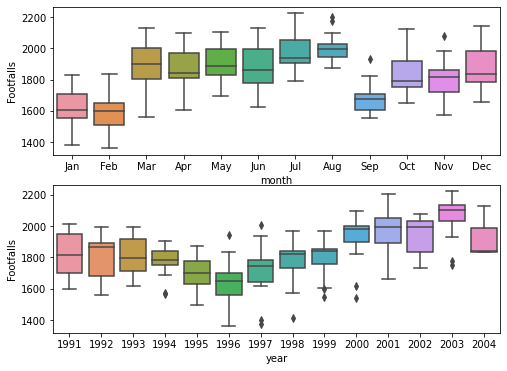

In [8]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Footfalls",data=Walmart)
plt.subplot(212)
sns.boxplot(x="year",y="Footfalls",data=Walmart)


In [9]:
#month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
#import numpy as np
#p = Walmart["Month"][0]
#p[0:3]
#Walmart['months']= 0

#for i in range(159):
#    p = Walmart["Month"][i]
#    Walmart['months'][i]= p[0:3]
    
#month_dummies = pd.DataFrame(pd.get_dummies(Walmart['months']))
#Walmart1 = pd.concat([footfalls,month_dummies],axis = 1)

#Walmart1["t"] = np.arange(1,160)

#Walmart1["t_squared"] = Walmart1["t"]*Walmart1["t"]
#Walmart1.columns
#Walmart1["log_footfalls"] = np.log(Walmart1["Footfalls "])
#Walmart1.rename(columns={"Footfalls ": 'Footfalls'}, inplace=True)
#Walmart1.Footfalls.plot()

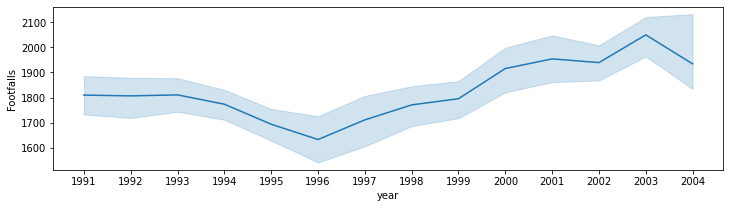

In [10]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Footfalls",data=Walmart)

# Splitting data

In [11]:
Train = Walmart.head(147)
Test = Walmart.tail(12)

In [13]:
Test

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year
147,Apr-03,2099,148,7.649216,21904,0,0,0,1,0,0,0,0,0,0,0,0,2003-04-01,Apr,2003
148,May-03,2105,149,7.652071,22201,0,0,0,0,1,0,0,0,0,0,0,0,2003-05-01,May,2003
149,Jun-03,2130,150,7.663877,22500,0,0,0,0,0,1,0,0,0,0,0,0,2003-06-01,Jun,2003
150,Jul-03,2223,151,7.706613,22801,0,0,0,0,0,0,1,0,0,0,0,0,2003-07-01,Jul,2003
151,Aug-03,2174,152,7.684324,23104,0,0,0,0,0,0,0,1,0,0,0,0,2003-08-01,Aug,2003
152,Sep-03,1931,153,7.565793,23409,0,0,0,0,0,0,0,0,1,0,0,0,2003-09-01,Sep,2003
153,Oct-03,2121,154,7.659643,23716,0,0,0,0,0,0,0,0,0,1,0,0,2003-10-01,Oct,2003
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01,Nov,2003
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01,Dec,2003
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01,Jan,2004


In [14]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Footfalls~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_linear))**2))
rmse_linear

209.92559265462572

In [15]:
#Exponential

Exp = smf.ols('log_footfalls~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


217.05263569546307

In [16]:
#Quadratic 

Quad = smf.ols('Footfalls~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_Quad))**2))
rmse_Quad

137.15462741356473

In [17]:
#Additive seasonality 

add_sea = smf.ols('Footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_add_sea))**2))
rmse_add_sea

264.66439005687755

In [18]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

50.60724584162444

In [19]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

268.19703252662697

In [20]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_footfalls~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

172.7672678749134

In [21]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,50.607246
2,rmse_Quad,137.154627
6,rmse_Mult_add_sea,172.767268
0,rmse_linear,209.925593
1,rmse_Exp,217.052636
3,rmse_add_sea,264.664390
5,rmse_Mult_sea,268.197033


#### Predict for new time period

In [22]:
predict_data = pd.read_csv("Predict_new.csv")

In [23]:
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561


In [24]:
#Build the model on entire data set
model_full = smf.ols('Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Walmart).fit()

In [25]:
pred_new  = pd.Series(add_sea_Quad.predict(predict_data))
pred_new

0     2213.628216
1     2252.669534
2     2219.210851
3     2331.668836
4     2384.626820
5     2059.418138
6     2206.876122
7     2204.750773
8     2256.708757
9     2028.471300
10    1999.332467
11    2308.270556
dtype: float64

In [26]:
predict_data["forecasted_Footfalls"] = pd.Series(pred_new)

In [27]:
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square,forecasted_Footfalls
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600,2213.628216
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921,2252.669534
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244,2219.210851
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569,2331.668836
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896,2384.626820
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225,2059.418138
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556,2206.876122
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889,2204.750773
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224,2256.708757
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561,2028.471300
